In [1]:
#python 3
%pylab inline

import numpy as np
import numpy.ma as ma
#from matplotlib.pyplot import plot,scatter,savefig,figure,colorbar,suptitle,close,show,subplot,rgrids, contourf, contour
from matplotlib.mlab import csv2rec
import matplotlib.pyplot as plt
import datetime 
from operator import *
from matplotlib.dates import DateFormatter
import pandas as pd
from pprint import pprint

Populating the interactive namespace from numpy and matplotlib


In [67]:
CS650=pd.read_csv('/Users/Eren/Desktop/data/CS650 and CS215 data/Level 6/CS650s_theta.csv')#,encoding='utf-8-sig') #utf-8-sig removes non-printing character in first column header
CS650.head()

,TIMESTAMP,RECORD,BattV_Min,EC_Avg,EC,P_Avg,Theta,P,T_Avg,T,...,P_15,T_15_Avg,T_15,EC_16_Avg,EC_16,P_16_Avg,Theta_16,P_16,T_16_Avg,T_16
0,9/28/17 8:00,0,12.96,0.002,0.003,2.455,0.015435,2.454,16.31,16.34,...,4.745,16.38,16.38,0.002,0.002,3.102,0.032414,3.102,16.28,16.28
1,9/28/17 8:15,1,12.96,0.002,0.002,2.455,0.015435,2.455,16.31,16.30,...,4.745,16.37,16.37,0.002,0.002,3.102,0.032414,3.102,16.26,16.23
2,9/28/17 8:30,2,12.93,0.002,0.002,2.455,0.015435,2.455,16.29,16.32,...,4.745,16.36,16.36,0.002,0.002,3.102,0.032414,3.102,16.24,16.20
3,9/28/17 8:45,3,12.96,0.002,0.002,2.455,0.015435,2.455,16.28,16.27,...,4.745,16.35,16.36,0.002,0.002,3.102,0.032414,3.102,16.21,16.20
4,9/28/17 9:00,4,12.96,0.002,0.003,2.455,0.015435,2.454,16.27,16.27,...,4.743,16.35,16.33,0.002,0.002,3.102,0.032414,3.102,16.18,16.15


In [85]:
rainfallCmt=pd.read_csv('/Users/Eren/Desktop/data/weather data/Rainfall_Cumulative_mm_WSAM_WY17-18.csv')
rainfallCmt.head()

,ValueID,DataValue,LocalDateTime,UTCOffset,SiteCode,VariableCode,QualifierCode,MethodName,QualityControlLevelCode,DatastreamName,StationName
0,516282140,0,2017-10-01 00:00:00,-8,wsam,Rainfall Cumulative mm,P,Derived Cumulative Rainfall,2.1,Rainfall Cumulative mm WSAM,Angelo Meadow WS
1,516282141,0,2017-10-01 00:05:00,-8,wsam,Rainfall Cumulative mm,P,Derived Cumulative Rainfall,2.1,Rainfall Cumulative mm WSAM,Angelo Meadow WS
2,516282142,0,2017-10-01 00:10:00,-8,wsam,Rainfall Cumulative mm,P,Derived Cumulative Rainfall,2.1,Rainfall Cumulative mm WSAM,Angelo Meadow WS
3,516282143,0,2017-10-01 00:15:00,-8,wsam,Rainfall Cumulative mm,P,Derived Cumulative Rainfall,2.1,Rainfall Cumulative mm WSAM,Angelo Meadow WS
4,516282144,0,2017-10-01 00:20:00,-8,wsam,Rainfall Cumulative mm,P,Derived Cumulative Rainfall,2.1,Rainfall Cumulative mm WSAM,Angelo Meadow WS


In [86]:
rainfallTB4= pd.read_csv('/Users/Eren/Desktop/data/weather data/Rainfall_mm_TB4_WSHQ_WY17-18.csv')
rainfallTB4.head()

,ValueID,DataValue,LocalDateTime,UTCOffset,SiteCode,VariableCode,QualifierCode,MethodName,QualityControlLevelCode,DatastreamName,StationName
0,529382412,0,2017-10-01 00:00:00,-8,wshq,Rainfall mm,P,TB4mm-L Rain Gage,2,Rainfall mm TB4 WSHQ,Angelo HQ WS
1,529382423,0,2017-10-01 00:05:00,-8,wshq,Rainfall mm,P,TB4mm-L Rain Gage,2,Rainfall mm TB4 WSHQ,Angelo HQ WS
2,529382434,0,2017-10-01 00:10:00,-8,wshq,Rainfall mm,P,TB4mm-L Rain Gage,2,Rainfall mm TB4 WSHQ,Angelo HQ WS
3,529382445,0,2017-10-01 00:15:00,-8,wshq,Rainfall mm,P,TB4mm-L Rain Gage,2,Rainfall mm TB4 WSHQ,Angelo HQ WS
4,529382456,0,2017-10-01 00:20:00,-8,wshq,Rainfall mm,P,TB4mm-L Rain Gage,2,Rainfall mm TB4 WSHQ,Angelo HQ WS


In [87]:


def legend(title, yaxis):#From Katelyn's code
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel(yaxis)
    grd = plt.grid(True)
    plt.xticks(rotation= 60)
    ax = plt.gca()
    legend = ax.legend(loc='upper left')
    
#rainfall variables
date_rainTB4 = pd.to_datetime(rainfallTB4['LocalDateTime'])
date_rainCmt = pd.to_datetime(rainfallCmt['LocalDateTime'])
rainTB4=rainfallTB4['DataValue']
rainCmt=rainfallCmt['DataValue']
                        
#all CS650s #From Katelyn's code
date_CS650 = pd.to_datetime(CS650['TIMESTAMP'])
BattV_CS650= CS650['BattV_Min']
EC1_CS650 = CS650['EC_Avg']
EC2_CS650 = CS650['EC_2_Avg']
EC3_CS650 = CS650['EC_3_Avg']
EC4_CS650 = CS650['EC_4_Avg']
EC5_CS650 = CS650['EC_5_Avg']
EC6_CS650 = CS650['EC_6_Avg']
EC7_CS650 = CS650['EC_7_Avg']
EC8_CS650 = CS650['EC_8_Avg']
EC9_CS650 = CS650['EC_9_Avg']
EC10_CS650 = CS650['EC_10_Avg']
EC11_CS650 = CS650['EC_11_Avg']
EC12_CS650 = CS650['EC_12_Avg']
EC13_CS650 = CS650['EC_13_Avg']
EC14_CS650 = CS650['EC_14_Avg']
EC15_CS650 = CS650['EC_15_Avg']
EC16_CS650 = CS650['EC_16_Avg']
T1_CS650 = CS650['T_Avg']
T2_CS650 = CS650['T_2_Avg']
T3_CS650 = CS650['T_3_Avg']
T4_CS650 = CS650['T_4_Avg']
T5_CS650 = CS650['T_5_Avg']
T6_CS650 = CS650['T_6_Avg']
T7_CS650 = CS650['T_7_Avg']
T8_CS650 = CS650['T_8_Avg']
T9_CS650 = CS650['T_9_Avg']
T10_CS650 = CS650['T_10_Avg']
T11_CS650 = CS650['T_11_Avg']
T12_CS650 = CS650['T_12_Avg']
T13_CS650 = CS650['T_13_Avg']
T14_CS650 = CS650['T_14_Avg']
T15_CS650 = CS650['T_15_Avg']
T16_CS650 = CS650['T_16_Avg']
P1_CS650 = CS650['P_Avg']
P2_CS650 = CS650['P_2_Avg']
P3_CS650 = CS650['P_3_Avg']
P4_CS650 = CS650['P_4_Avg']
P5_CS650 = CS650['P_5_Avg']
P6_CS650 = CS650['P_6_Avg']
P7_CS650 = CS650['P_7_Avg']
P8_CS650 = CS650['P_8_Avg']
P9_CS650 = CS650['P_9_Avg']
P10_CS650 = CS650['P_10_Avg']
P11_CS650 = CS650['P_11_Avg']
P12_CS650 = CS650['P_12_Avg']
P13_CS650 = CS650['P_13_Avg']
P14_CS650 = CS650['P_14_Avg']
P15_CS650 = CS650['P_15_Avg']
P16_CS650 = CS650['P_16_Avg']
TH1_CS650 = CS650['Theta']
TH2_CS650 = CS650['Theta_2']
TH3_CS650 = CS650['Theta_3']
TH4_CS650 = CS650['Theta_4']
TH5_CS650 = CS650['Theta_5']
TH6_CS650 = CS650['Theta_6']
TH7_CS650 = CS650['Theta_7']
TH8_CS650 = CS650['Theta_8']
TH9_CS650 = CS650['Theta_9']
TH10_CS650 = CS650['Theta_10']
TH11_CS650 = CS650['Theta_11']
TH12_CS650 = CS650['Theta_12']
TH13_CS650 = CS650['Theta_13']
TH14_CS650 = CS650['Theta_14']
TH15_CS650 = CS650['Theta_15']
TH16_CS650 = CS650['Theta_16']

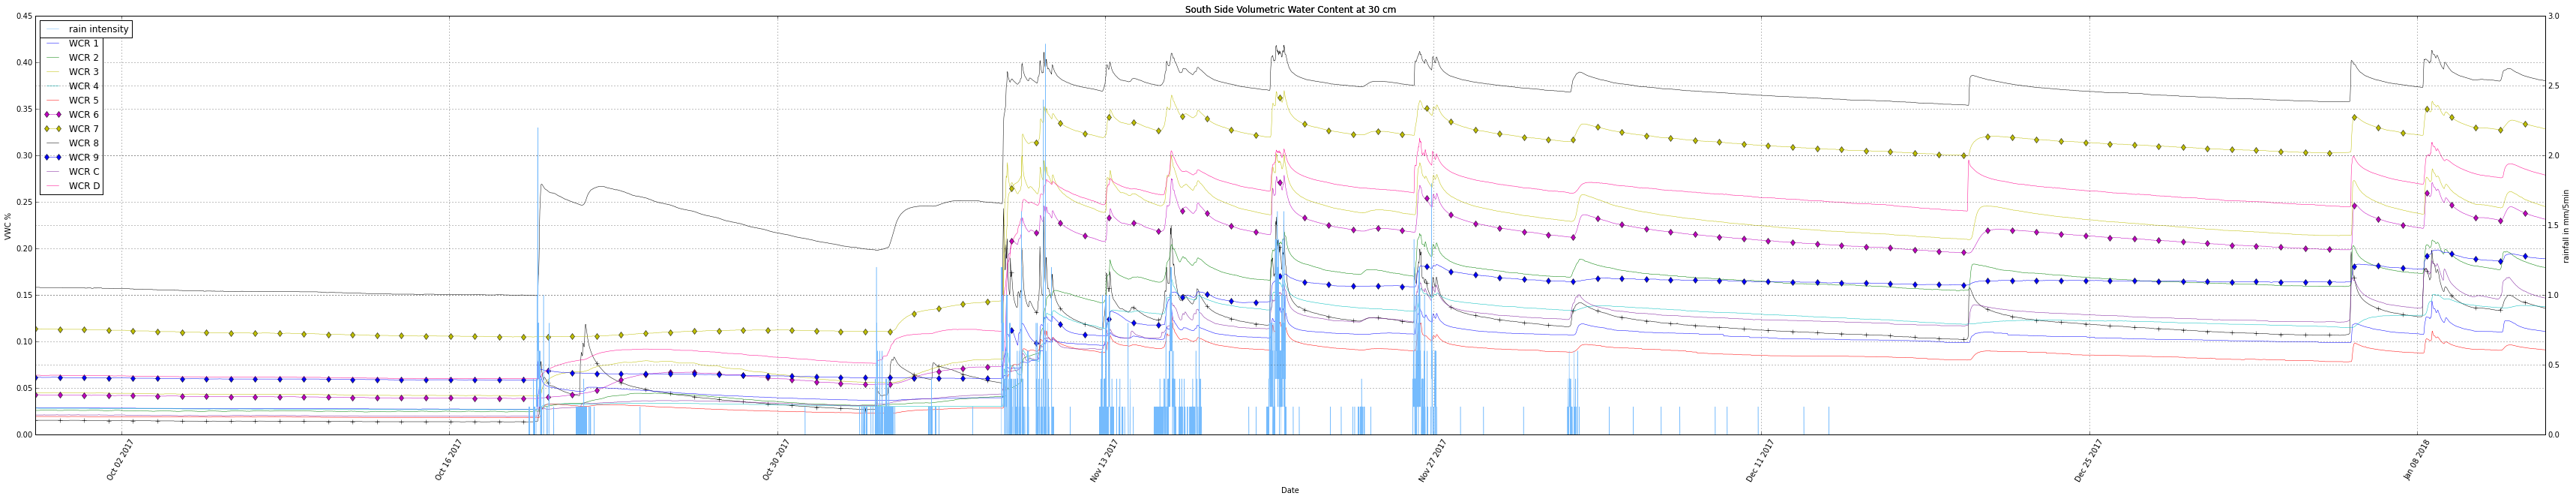

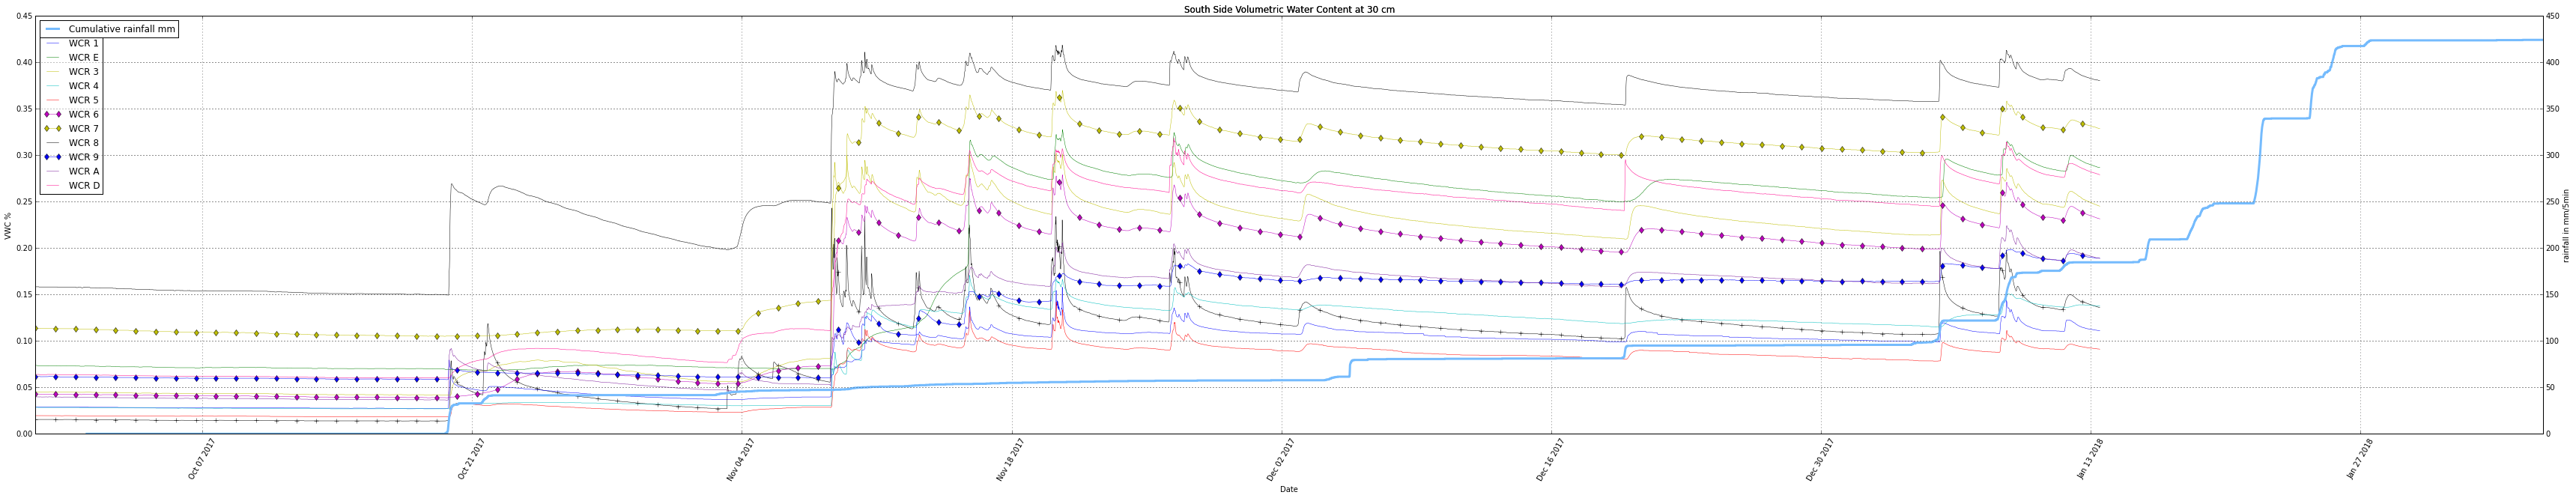

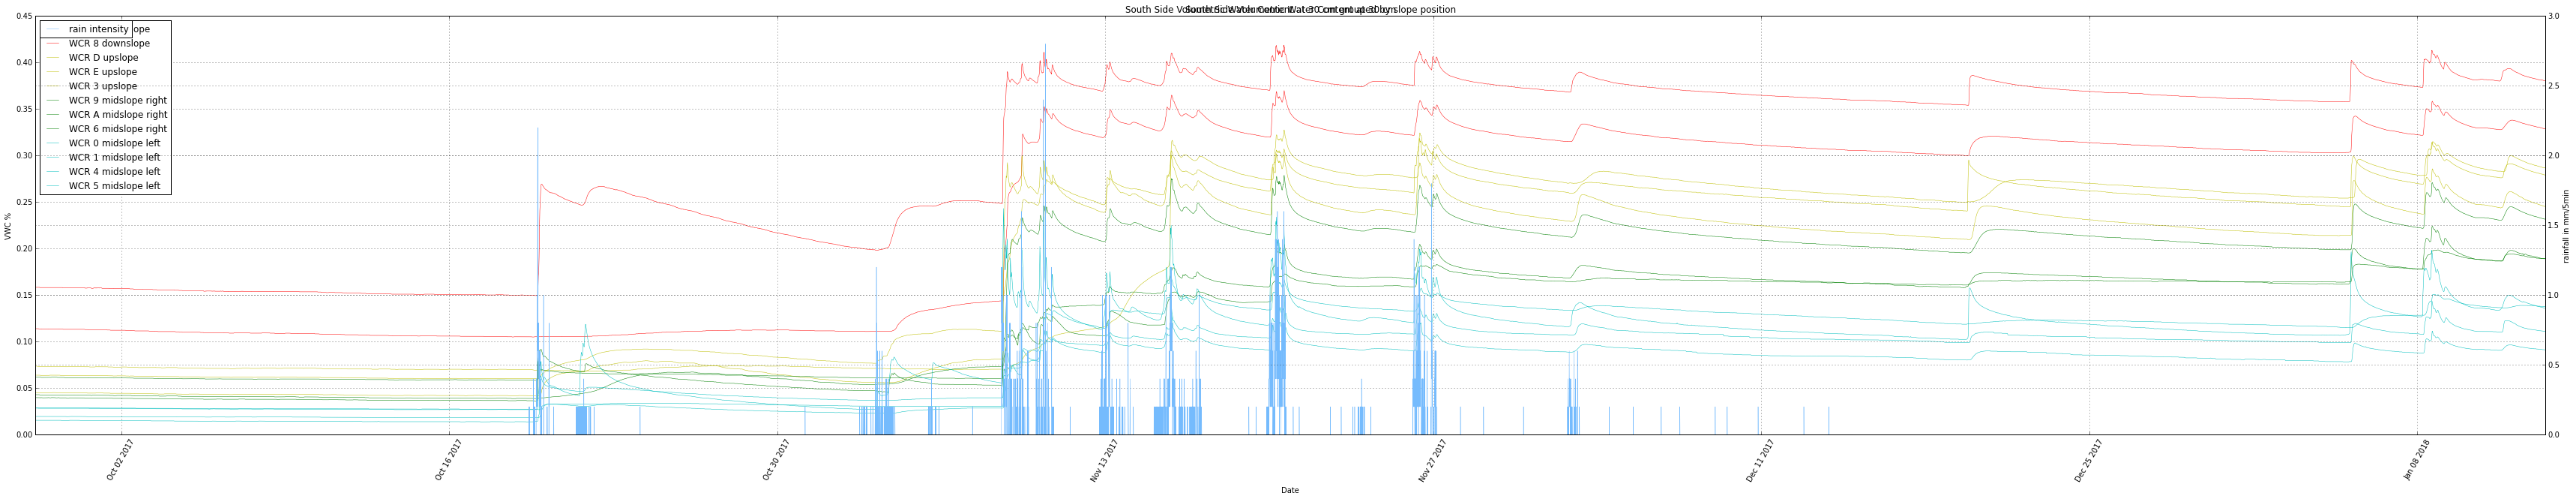

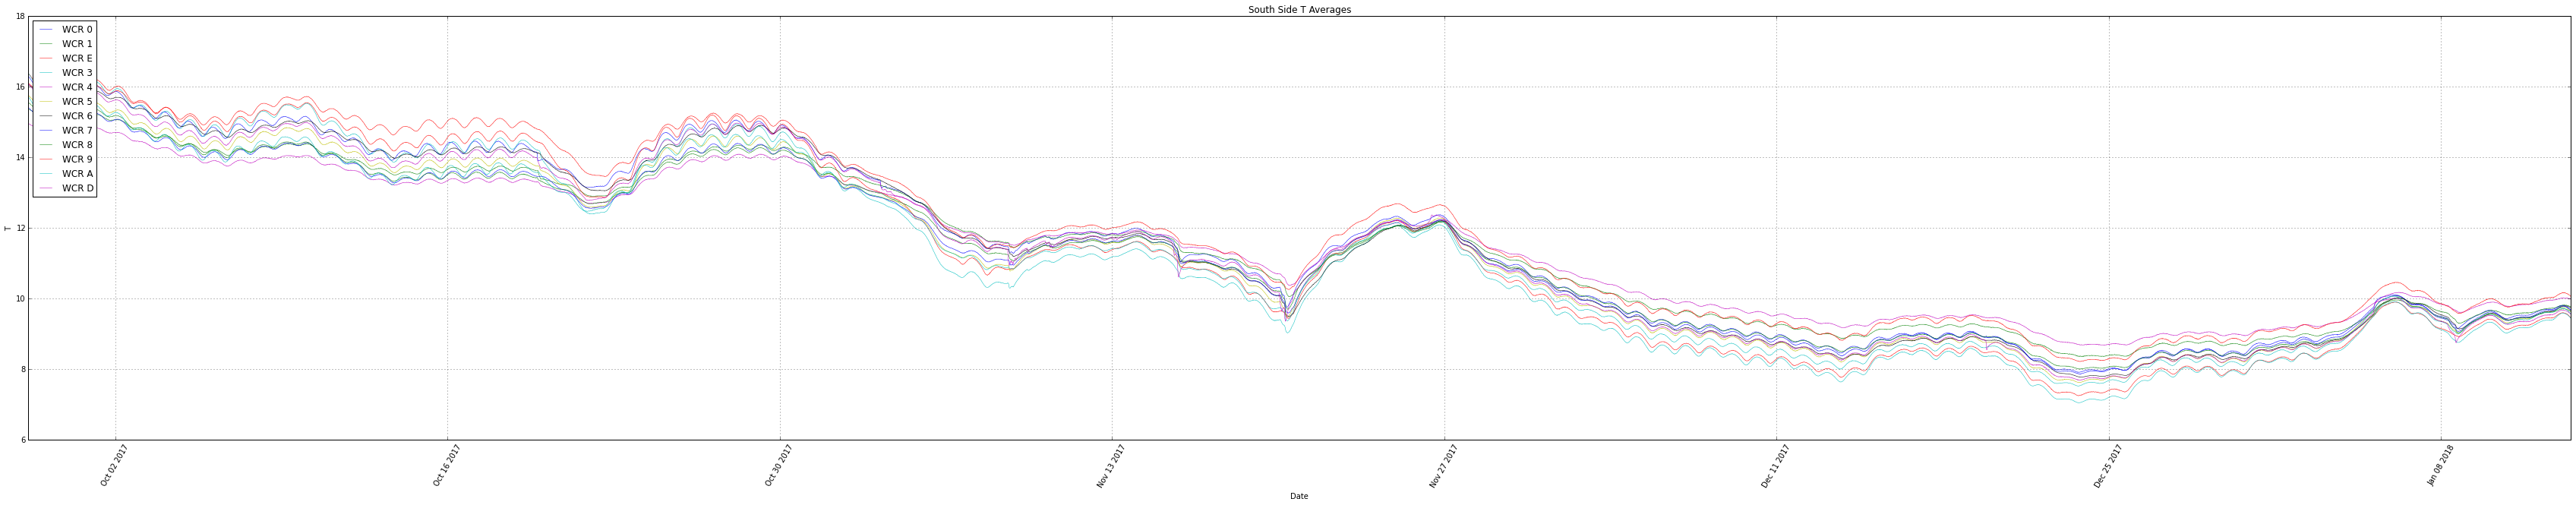

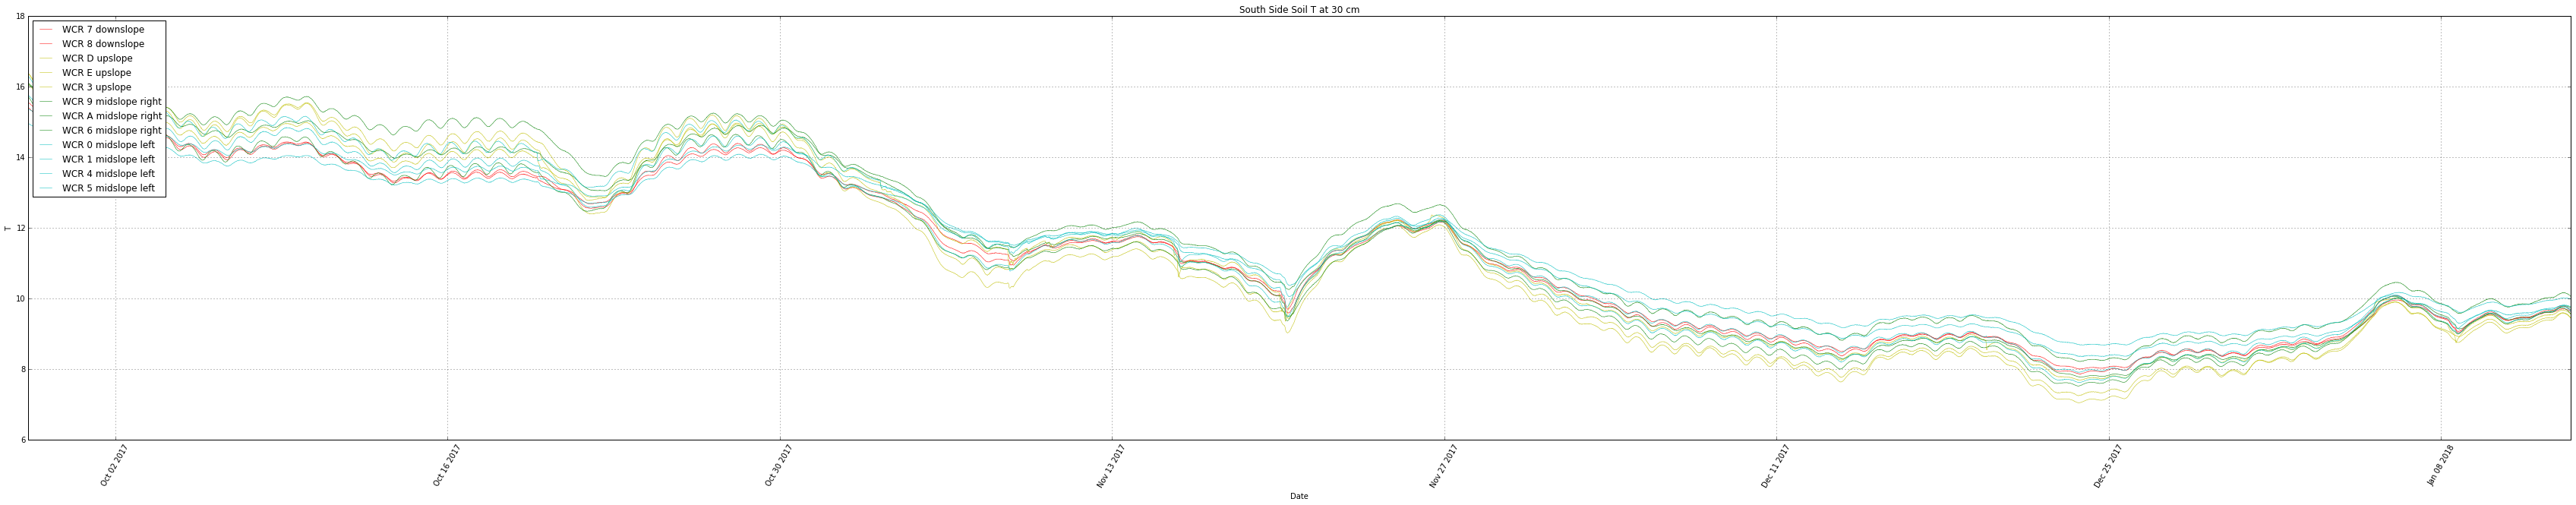

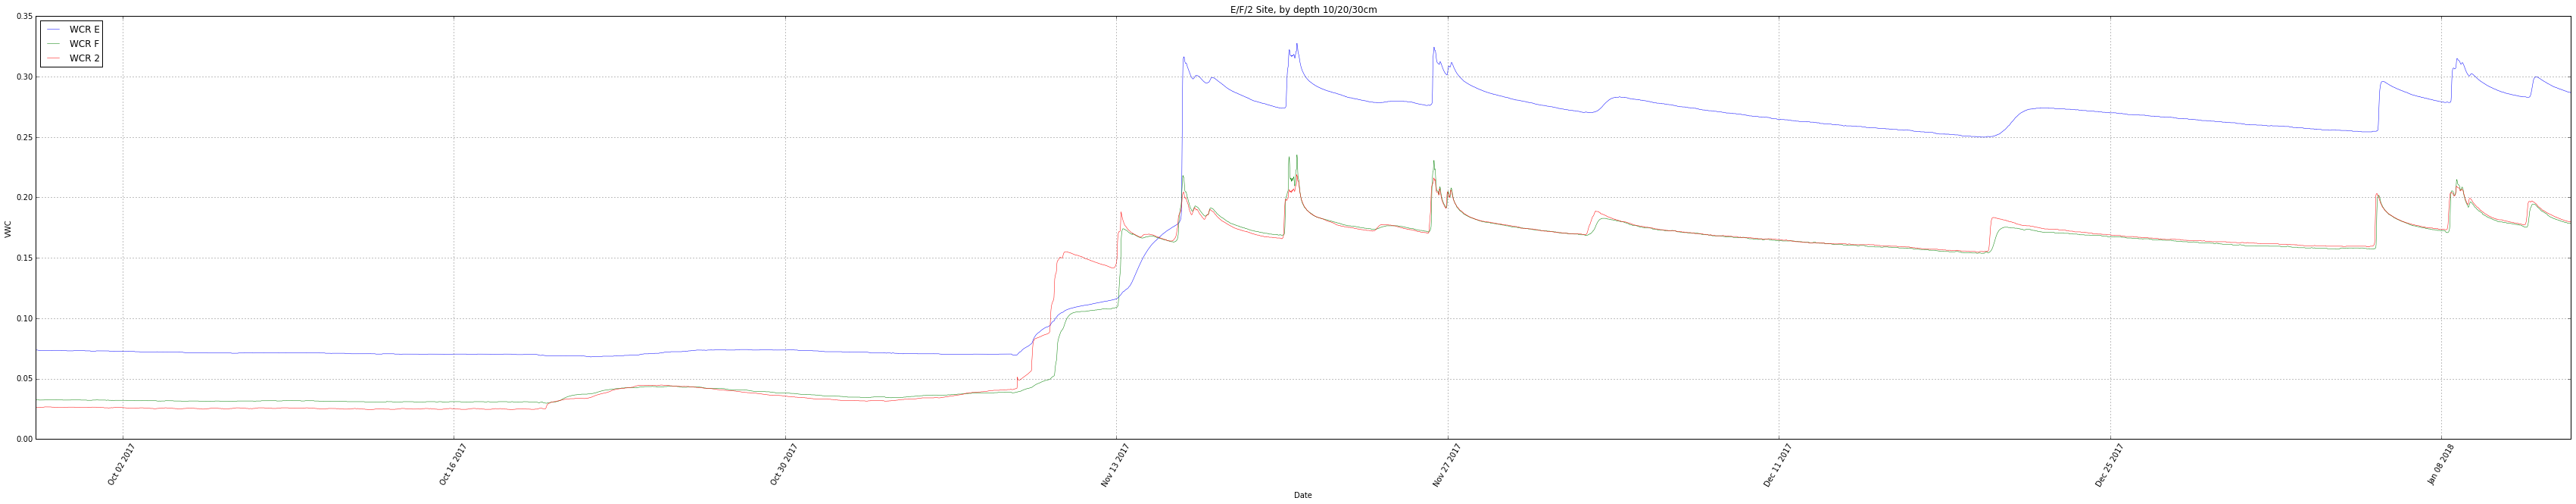

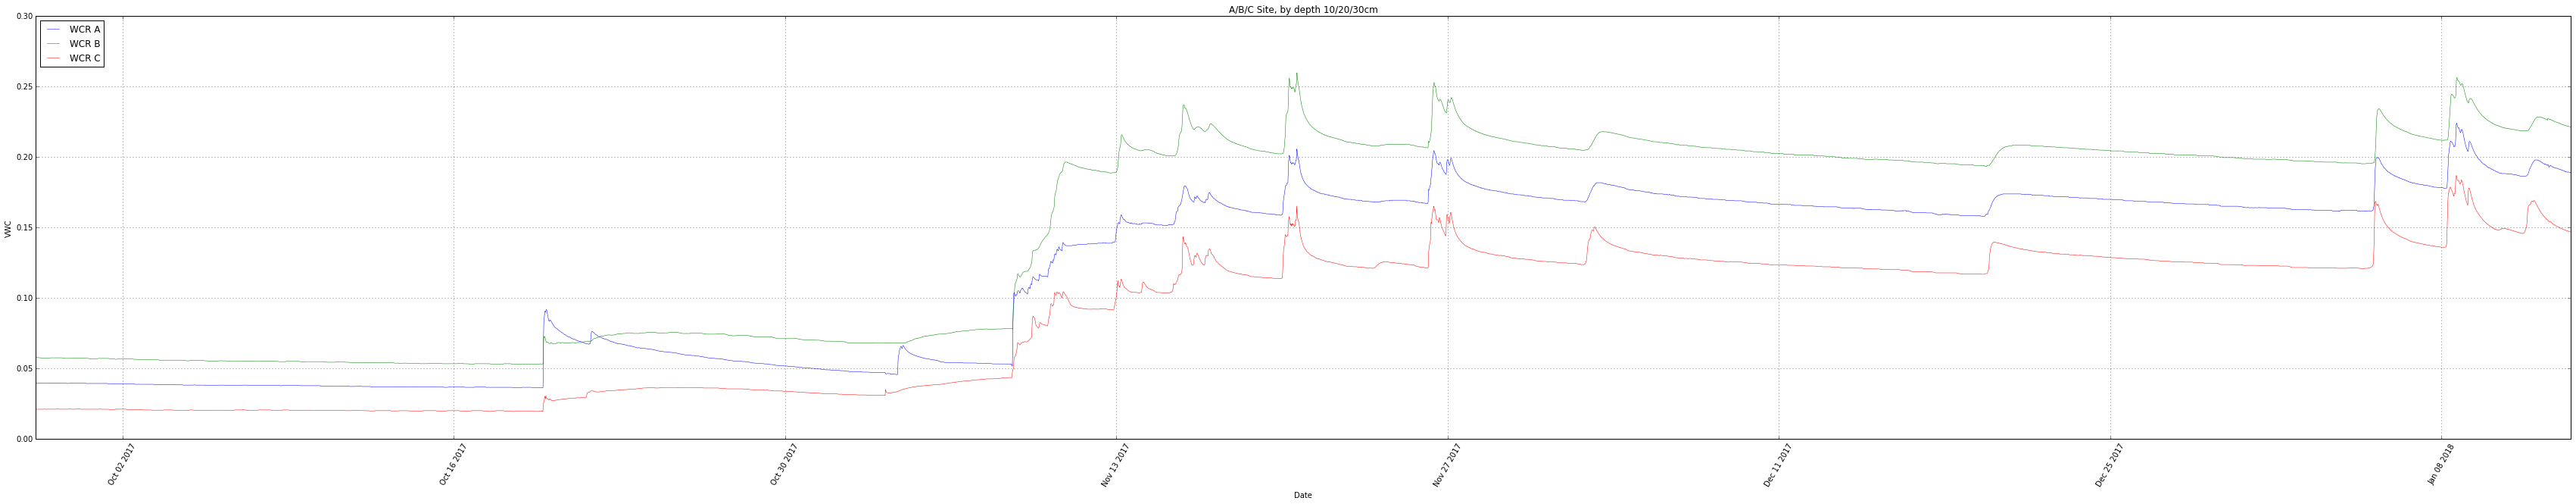

In [124]:
fig, ax1 = plt.subplots(figsize=(60,10))
ax1.plot(date_CS650, TH1_CS650, label = 'WCR 0', color='k', marker='+', markevery=100, linewidth=.5)
ax1.plot(date_CS650, TH2_CS650, label = 'WCR 1', color='b', linewidth=.5)
ax1.plot(date_CS650, TH3_CS650, label = 'WCR 2', color='g', linewidth=.5)
ax1.plot(date_CS650, TH4_CS650, label = 'WCR 3', color='y', linewidth=.5)
ax1.plot(date_CS650, TH5_CS650, label = 'WCR 4', color='c', linewidth=.5)
ax1.plot(date_CS650, TH6_CS650, label = 'WCR 5', color='r', linewidth=.5)
ax1.plot(date_CS650, TH7_CS650, label = 'WCR 6', color='m', marker='d', markevery=100, linewidth=.5)
ax1.plot(date_CS650, TH8_CS650, label = 'WCR 7', color='y', marker='d', markevery=100, linewidth=.5)
ax1.plot(date_CS650, TH9_CS650, label = 'WCR 8', color='k', linewidth=.5)
ax1.plot(date_CS650, TH10_CS650, label = 'WCR 9', color='b', marker='d', markevery=100, linewidth=.5)
ax1.plot(date_CS650, TH13_CS650, label = 'WCR C', color='#7e1e9c', linewidth=.5)
ax1.plot(date_CS650, TH14_CS650, label = 'WCR D', color='#ff028d', linewidth=.5)
legend('South Side Volumetric Water Content at 30 cm', 'VWC %')
ax2=ax1.twinx()
ax2.plot(date_rainTB4, rainTB4, label = 'rain intensity', color='#75bbfd', linewidth=.5)
legend('South Side Volumetric Water Content at 30 cm', 'rainfall in mm/5min')
plt.show()
fig.savefig ('south side soil moisture with rain intensity.png')

fig, ax1 = plt.subplots(figsize=(60,10))
ax1.plot(date_CS650, TH1_CS650, label = 'WCR 0', color='k', marker='+', markevery=100, linewidth=.5)
ax1.plot(date_CS650, TH2_CS650, label = 'WCR 1', color='b', linewidth=.5)
ax1.plot(date_CS650, TH15_CS650, label = 'WCR E', color='g', linewidth=.5)
ax1.plot(date_CS650, TH4_CS650, label = 'WCR 3', color='y', linewidth=.5)
ax1.plot(date_CS650, TH5_CS650, label = 'WCR 4', color='c', linewidth=.5)
ax1.plot(date_CS650, TH6_CS650, label = 'WCR 5', color='r', linewidth=.5)
ax1.plot(date_CS650, TH7_CS650, label = 'WCR 6', color='m', marker='d', markevery=100, linewidth=.5)
ax1.plot(date_CS650, TH8_CS650, label = 'WCR 7', color='y', marker='d', markevery=100, linewidth=.5)
ax1.plot(date_CS650, TH9_CS650, label = 'WCR 8', color='k', linewidth=.5)
ax1.plot(date_CS650, TH10_CS650, label = 'WCR 9', color='b', marker='d', markevery=100, linewidth=.5)
ax1.plot(date_CS650, TH11_CS650, label = 'WCR A', color='#7e1e9c', linewidth=.5)
ax1.plot(date_CS650, TH14_CS650, label = 'WCR D', color='#ff028d', linewidth=.5)
legend('South Side Volumetric Water Content at 30 cm', 'VWC %')
ax2=ax1.twinx()
ax2.plot(date_rainCmt, rainCmt, label = 'Cumulative rainfall mm', color='#75bbfd', linewidth=3)
legend('South Side Volumetric Water Content at 30 cm', 'rainfall in mm/5min')
plt.show()
fig.savefig ('south side soil moisture with cumulative rainfall.png')


fig, ax1 = plt.subplots(figsize=(60,10))
ax1.plot(date_CS650, TH8_CS650, label = 'WCR 7 downslope', color='r', linewidth=.5)
ax1.plot(date_CS650, TH9_CS650, label = 'WCR 8 downslope', color='r', linewidth=.5)
ax1.plot(date_CS650, TH14_CS650, label = 'WCR D upslope', color='y', linewidth=.5)
ax1.plot(date_CS650, TH15_CS650, label = 'WCR E upslope', color='y', linewidth=.5)
ax1.plot(date_CS650, TH4_CS650, label = 'WCR 3 upslope', color='y', linewidth=.5)
ax1.plot(date_CS650, TH10_CS650, label = 'WCR 9 midslope right', color='g', linewidth=.5)
ax1.plot(date_CS650, TH11_CS650, label = 'WCR A midslope right', color='g', linewidth=.5)
ax1.plot(date_CS650, TH7_CS650, label = 'WCR 6 midslope right', color='g', linewidth=.5)
ax1.plot(date_CS650, TH1_CS650, label = 'WCR 0 midslope left', color='c', linewidth=.5)
ax1.plot(date_CS650, TH2_CS650, label = 'WCR 1 midslope left', color='c', linewidth=.5)
ax1.plot(date_CS650, TH5_CS650, label = 'WCR 4 midslope left', color='c', linewidth=.5)
ax1.plot(date_CS650, TH6_CS650, label = 'WCR 5 midslope left', color='c', linewidth=.5)

legend('South Side Volumetric Water Content at 30 cm', 'VWC %')
ax2=ax1.twinx()
ax2.plot(date_rainTB4, rainTB4, label = 'rain intensity', color='#75bbfd', linewidth=.5)
legend('South Side Volumetric Water Content at 30 cm grouped by slope position', 'rainfall in mm/5min')
plt.show()
fig.savefig ('slope position soil moisture with rain intensity finer res2.png')

fig=plt.figure(figsize=(60,10))
plt.plot(date_CS650, T1_CS650, label = 'WCR 0', linewidth=.5)
plt.plot(date_CS650, T2_CS650, label = 'WCR 1', linewidth=.5)
plt.plot(date_CS650, T15_CS650, label = 'WCR E', linewidth=.5)
plt.plot(date_CS650, T4_CS650, label = 'WCR 3', linewidth=.5)
plt.plot(date_CS650, T5_CS650, label = 'WCR 4', linewidth=.5)
plt.plot(date_CS650, T6_CS650, label = 'WCR 5', linewidth=.5)
plt.plot(date_CS650, T7_CS650, label = 'WCR 6', linewidth=.5)
plt.plot(date_CS650, T8_CS650, label = 'WCR 7', linewidth=.5)
plt.plot(date_CS650, T9_CS650, label = 'WCR 8', linewidth=.5)
plt.plot(date_CS650, T10_CS650, label = 'WCR 9', linewidth=.5)
plt.plot(date_CS650, T11_CS650, label = 'WCR A', linewidth=.5)
plt.plot(date_CS650, T14_CS650, label = 'WCR D', linewidth=.5)
legend('South Side T Averages', 'T')
plt.show()
fig.savefig ('30 cm soil temperature.png')

fig=plt.figure(figsize=(60,10))
plt.plot(date_CS650, T8_CS650, label = 'WCR 7 downslope', color='r', linewidth=.5)
plt.plot(date_CS650, T9_CS650, label = 'WCR 8 downslope', color='r', linewidth=.5)
plt.plot(date_CS650, T14_CS650, label = 'WCR D upslope', color='y', linewidth=.5)
plt.plot(date_CS650, T15_CS650, label = 'WCR E upslope', color='y', linewidth=.5)
plt.plot(date_CS650, T4_CS650, label = 'WCR 3 upslope', color='y', linewidth=.5)
plt.plot(date_CS650, T10_CS650, label = 'WCR 9 midslope right', color='g', linewidth=.5)
plt.plot(date_CS650, T11_CS650, label = 'WCR A midslope right', color='g', linewidth=.5)
plt.plot(date_CS650, T7_CS650, label = 'WCR 6 midslope right', color='g', linewidth=.5)
plt.plot(date_CS650, T1_CS650, label = 'WCR 0 midslope left', color='c', linewidth=.5)
plt.plot(date_CS650, T2_CS650, label = 'WCR 1 midslope left', color='c', linewidth=.5)
plt.plot(date_CS650, T5_CS650, label = 'WCR 4 midslope left', color='c', linewidth=.5)
plt.plot(date_CS650, T6_CS650, label = 'WCR 5 midslope left', color='c', linewidth=.5)
legend('South Side Soil T at 30 cm', 'T')
plt.show()
fig.savefig ('slope position 30 cm soil temperature.png')

plt.figure(figsize=(60,10))
plt.plot(date_CS650, TH15_CS650, label = 'WCR E', linewidth=.5)
plt.plot(date_CS650, TH16_CS650, label = 'WCR F', linewidth=.5)
plt.plot(date_CS650, TH3_CS650, label = 'WCR 2', linewidth=.5)
legend('E/F/2 Site, by depth 10/20/30cm', 'VWC')
plt.show()

plt.figure(figsize=(60,10))
plt.plot(date_CS650, TH11_CS650, label = 'WCR A', linewidth=.5)
plt.plot(date_CS650, TH12_CS650, label = 'WCR B', linewidth=.5)
plt.plot(date_CS650, TH13_CS650, label = 'WCR C', linewidth=.5)
legend('A/B/C Site, by depth 10/20/30cm', 'VWC')
plt.show()

